### **Visual icesat1 data on the selected region.**

In [22]:
import h5py
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
import numpy as np
import warnings
warnings.filterwarnings('ignore')


In [27]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_setp_vec = 'data/boundary/setp_zhao2022.gpkg'
# path_glah14_readout = 'data/icesat-1/GLAH14-2006/readout/GLAH14_634_2115_001_1317_0_01_0001_readout_subs.h5'
path_glah14_tile= 'data/icesat-1/GLAH14-2005/tiles/tile_29_98.h5'
path_glah14_setp = 'data/icesat-1/GLAH14-2005/tiles/tiles_merge.h5'


### Read icesat-1 glah14 data

In [28]:
# !h5ls $path_glah14_2006_readout
# !h5ls $path_glah14_2006_tile
!h5ls $path_glah14_setp


h                        Dataset {9660}
lat                      Dataset {9660}
lon                      Dataset {9660}
orbit                    Dataset {9660}
t_dyr                    Dataset {9660}
track                    Dataset {9660}


In [29]:
# glah14_readout = h5py.File(path_glah14_readout,'r')
glah14_tile = h5py.File(path_glah14_tile,'r')
glah14_setp = h5py.File(path_glah14_setp,'r')



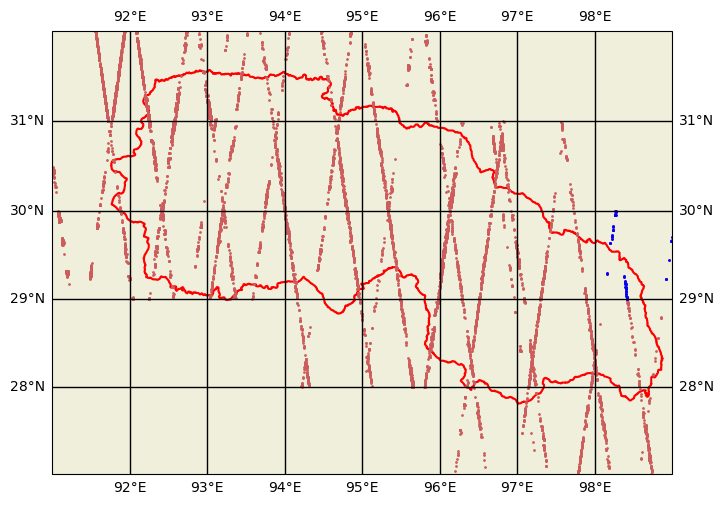

In [32]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([91, 99, 27.0, 32.0])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=1, alpha=1, zorder=1, color='black')
## 1. setp boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_setp_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
## 2. icesat-1 data (setp region)
ax.scatter(x=glah14_setp['lon'][:], y=glah14_setp['lat'][:], color='IndianRed', s=1, transform=ccrs.PlateCarree(), zorder=0)


# ## 3. icesat-1 data (one file)
# ax.scatter(x=glah14_2006_readout['lon'][:], y=glah14_2006_readout['lat'][:], color='green', \
#                                                                         s=1, transform=ccrs.PlateCarree(), zorder=0)

## 4. icesat-1 data (one tile)
ax.scatter(x=glah14_tile['lon'][:], y=glah14_tile['lat'][:], \
                                                        color='blue', s=1, transform=ccrs.PlateCarree(), zorder=0)

